In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
orders=pd.read_excel(r"Dataset.xlsx", sheet_name="Orders")
returned=pd.read_excel(r"Dataset.xlsx", sheet_name="Return")

In [2]:
print(orders.info())
print(returned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Price   9994 non-null   float64       
 12  Discount     9994 non-null   float64       
 13  Profit       9994 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 1.1+ MB
None
<class 'pandas.core.fra

In [3]:
# Bỏ các order bị return

non_returned=orders[~orders['Order ID'].isin(returned['Order ID'])]
print(non_returned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9194 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9194 non-null   int64         
 1   Order ID     9194 non-null   object        
 2   Order Date   9194 non-null   datetime64[ns]
 3   Ship Date    9194 non-null   datetime64[ns]
 4   Ship Mode    9194 non-null   object        
 5   Customer ID  9194 non-null   object        
 6   Channel      9194 non-null   object        
 7   Postal Code  9194 non-null   int64         
 8   Product ID   9194 non-null   object        
 9   Sales        9194 non-null   float64       
 10  Quantity     9194 non-null   int64         
 11  Unit Price   9194 non-null   float64       
 12  Discount     9194 non-null   float64       
 13  Profit       9194 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 1.1+ MB
None


In [4]:


# Giả định hiện tại = ngày lớn nhất trong tập dữ liệu + 1

import datetime
current_date= max(non_returned['Order Date']) + datetime.timedelta(days=1)

# Tính các giá trị R,F,M, Group by Customer_ID

non_returned_overall = non_returned.groupby(['Customer ID']).agg(
    {'Order Date': lambda x: (current_date- x.max()).days,
     'Order ID':'nunique',
     'Sales':'sum'
    }).reset_index()

non_returned_overall.rename(columns={'Order Date':'Recency','Order ID':'Frequency','Sales':'MonetaryValue'}, inplace=True)

In [5]:
print(non_returned_overall)

    Customer ID  Recency  Frequency  MonetaryValue
0      AA-10315      185          5       5563.560
1      AA-10375       20          9       1056.390
2      AA-10480      260          4       1790.512
3      AA-10645      483          5       5073.975
4      AB-10015      416          3        886.156
..          ...      ...        ...            ...
786    XP-21865       83          9       2110.726
787    YC-21895        5          4       5438.650
788    YS-21880       10          8       6720.444
789    ZC-21910       55         12       7892.998
790    ZD-21925      203          4       1249.184

[791 rows x 4 columns]


In [6]:
R_80 = non_returned_overall['Recency'].quantile(0.8)
R_60 = non_returned_overall['Recency'].quantile(0.6)
R_40 = non_returned_overall['Recency'].quantile(0.4)
R_20 = non_returned_overall['Recency'].quantile(0.2)

F_80 = non_returned_overall['Frequency'].quantile(0.8)
F_60 = non_returned_overall['Frequency'].quantile(0.6)
F_40 = non_returned_overall['Frequency'].quantile(0.4)
F_20 = non_returned_overall['Frequency'].quantile(0.2)

M_80 = non_returned_overall['MonetaryValue'].quantile(0.8)
M_60 = non_returned_overall['MonetaryValue'].quantile(0.6)
M_40 = non_returned_overall['MonetaryValue'].quantile(0.4)
M_20 = non_returned_overall['MonetaryValue'].quantile(0.2)



In [7]:
non_returned_overall['R'] = np.where(non_returned_overall['Recency'] < R_20, '5',
                                           (np.where(non_returned_overall['Recency'] < R_40,'4',
                                                     (np.where(non_returned_overall['Recency'] < R_60,'3',
                                                               (np.where(non_returned_overall['Recency'] < R_80,'2','1'))))))) 








In [8]:
non_returned_overall['F'] = np.where(non_returned_overall['Frequency'] > F_80, '5',
                                           (np.where(non_returned_overall['Frequency'] >= F_60,'4',
                                                     (np.where(non_returned_overall['Frequency'] >= F_40,'3',
                                                               (np.where(non_returned_overall['Frequency'] >= F_20,'2','1'))))))) 



In [9]:

non_returned_overall['M'] = np.where(non_returned_overall['MonetaryValue'] > M_80, '5',
                                           (np.where(non_returned_overall['MonetaryValue'] > M_60,'4',
                                                     (np.where(non_returned_overall['MonetaryValue'] > M_40,'3',
                                                               (np.where(non_returned_overall['MonetaryValue'] > M_20,'2','1'))))))) 








In [10]:
non_returned_overall['RFM Score']=non_returned_overall['R'] + non_returned_overall['F']  + non_returned_overall['M'] 
print(non_returned_overall)

    Customer ID  Recency  Frequency  MonetaryValue  R  F  M RFM Score
0      AA-10315      185          5       5563.560  2  3  5       235
1      AA-10375       20          9       1056.390  5  5  2       552
2      AA-10480      260          4       1790.512  1  2  3       123
3      AA-10645      483          5       5073.975  1  3  5       135
4      AB-10015      416          3        886.156  1  1  2       112
..          ...      ...        ...            ... .. .. ..       ...
786    XP-21865       83          9       2110.726  3  5  3       353
787    YC-21895        5          4       5438.650  5  2  5       525
788    YS-21880       10          8       6720.444  5  4  5       545
789    ZC-21910       55         12       7892.998  4  5  5       455
790    ZD-21925      203          4       1249.184  2  2  2       222

[791 rows x 8 columns]


In [11]:
group=pd.read_excel(r"Dataset.xlsx", sheet_name="Sheet2")

print(group)

                  Segment                                          RFM Score
0               Champions                  555, 554, 544, 545, 454, 455, 445
1                   Loyal        553, 543, 444, 435, 355, 354, 345, 344, 335
2      Potential Loyalist  551, 552, 541, 542, 533, 532, 531, 452, 451, 4...
3           New Customers                  512, 511, 422, 421, 412, 411, 311
4               Promising  525, 524, 523, 522, 521, 515, 514, 513, 425, 4...
5          Need Attention             535, 534, 443, 434, 343, 334, 325, 324
6          About To Sleep             331, 321, 312, 221, 213, 231, 241, 251
7                 At Risk  255, 254, 245, 244, 253, 252, 243, 242, 235, 2...
8        Cannot Lose Them             155, 154, 144, 214, 215, 115, 114, 113
9   Hibernating customers  332, 322, 233, 232, 223, 222, 132, 123, 122, 2...
10         Lost customers                       111, 112, 121, 131, 141, 151


In [12]:
group['RFM Score'] = group['RFM Score'].apply(lambda x: x.split(', '))
group = group.explode('RFM Score')

print(group)



           Segment RFM Score
0        Champions       555
0        Champions       554
0        Champions       544
0        Champions       545
0        Champions       454
..             ...       ...
10  Lost customers       112
10  Lost customers       121
10  Lost customers       131
10  Lost customers       141
10  Lost customers       151

[125 rows x 2 columns]


In [13]:
Segment=non_returned_overall.merge(group,how='left', on='RFM Score')


In [14]:
print(Segment)

    Customer ID  Recency  Frequency  MonetaryValue  R  F  M RFM Score  \
0      AA-10315      185          5       5563.560  2  3  5       235   
1      AA-10375       20          9       1056.390  5  5  2       552   
2      AA-10480      260          4       1790.512  1  2  3       123   
3      AA-10645      483          5       5073.975  1  3  5       135   
4      AB-10015      416          3        886.156  1  1  2       112   
..          ...      ...        ...            ... .. .. ..       ...   
786    XP-21865       83          9       2110.726  3  5  3       353   
787    YC-21895        5          4       5438.650  5  2  5       525   
788    YS-21880       10          8       6720.444  5  4  5       545   
789    ZC-21910       55         12       7892.998  4  5  5       455   
790    ZD-21925      203          4       1249.184  2  2  2       222   

                   Segment  
0                  At Risk  
1       Potential Loyalist  
2    Hibernating customers  
3      

In [15]:
Segment.to_excel("Segmentation.xlsx")

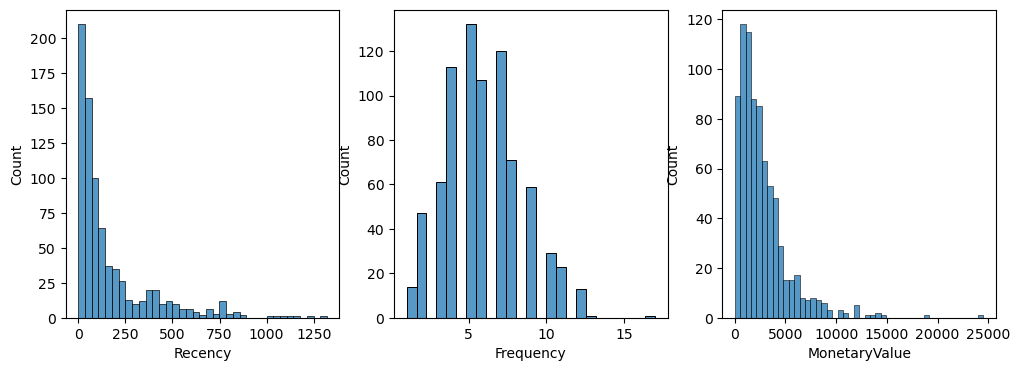

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.histplot(Segment['Recency'], ax = ax[0])
sns.histplot(Segment['Frequency'], ax = ax[1])
sns.histplot(Segment['MonetaryValue'], ax = ax[2])
plt.show()

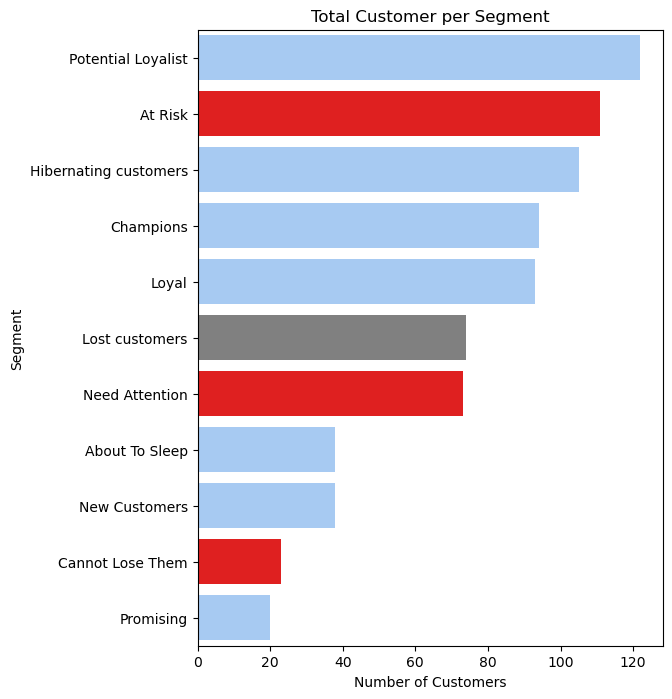

In [17]:
# group the data by segment and count the number of unique customers
kq = Segment.groupby('Segment')['Customer ID'].nunique().sort_values(ascending=False).reset_index()

# set the figure size
plt.figure(figsize=(6, 8))

# set the color for each segment
colors = ['#9ac9ff'] * len(kq)
colors[kq[kq['Segment'] == 'At Risk'].index[0]] = 'red'
colors[kq[kq['Segment'] == 'Cannot Lose Them'].index[0]] = 'red'
colors[kq[kq['Segment'] == 'Need Attention'].index[0]] = 'red'
colors[kq[kq['Segment'] == 'Lost customers'].index[0]] = 'grey'
# plot a horizontal bar chart
sns.barplot(data=kq.head(11), y='Segment', x='Customer ID', palette=colors).set(title='Total Customer per Segment')

# add labels to the x-axis and y-axis
plt.xlabel('Number of Customers')
plt.ylabel('Segment')

# show the plot
plt.show()


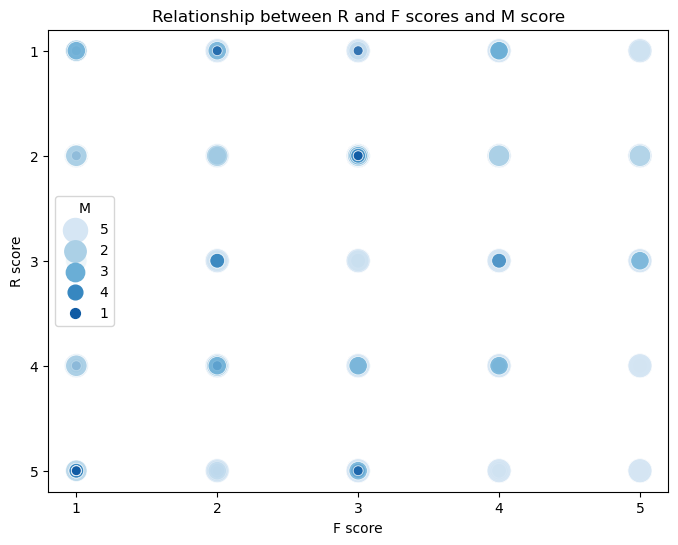

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# sort the R and F columns
Segment['R'] = Segment['R'].astype('category').cat.as_ordered()
Segment['F'] = Segment['F'].astype('category').cat.as_ordered()

# set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# create a bubble plot
sns.scatterplot(data=Segment, x='F', y='R', hue='M', size='M', sizes=(50, 300),
                palette='Blues', alpha=0.8, ax=ax)

# set the axis labels
ax.set_xlabel('F score')
ax.set_ylabel('R score')

# set the title
ax.set_title('Relationship between R and F scores and M score')

# show the plot
plt.show()

